In [2]:
import cv2
import numpy as np
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt

from hfnet.datasets.aachen import Aachen
from hfnet.evaluation.visualize import draw_keypoints
from hfnet.evaluation.loaders import export_loader

from utils import plot_images

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
config = {'load_db': True, 'load_queries': False, 'resize_max': 960} 
dataset = Aachen(**config)

In [3]:
all_configs = {
    'superpoint': {
        'experiment': 'super_point_pytorch/aachen_resize-960',
        'predictor': export_loader,
        'num_features': 3000,
        'do_nms': True,
        'nms_thresh': 8,
    },
    'lfnet': {
        'experiment': 'lfnet/aachen_full-size',
        'predictor': export_loader,
        'num_features': 500,
        'remove_borders': 4,
    }
}
configs = {c: all_configs[c] for c in ['superpoint']}

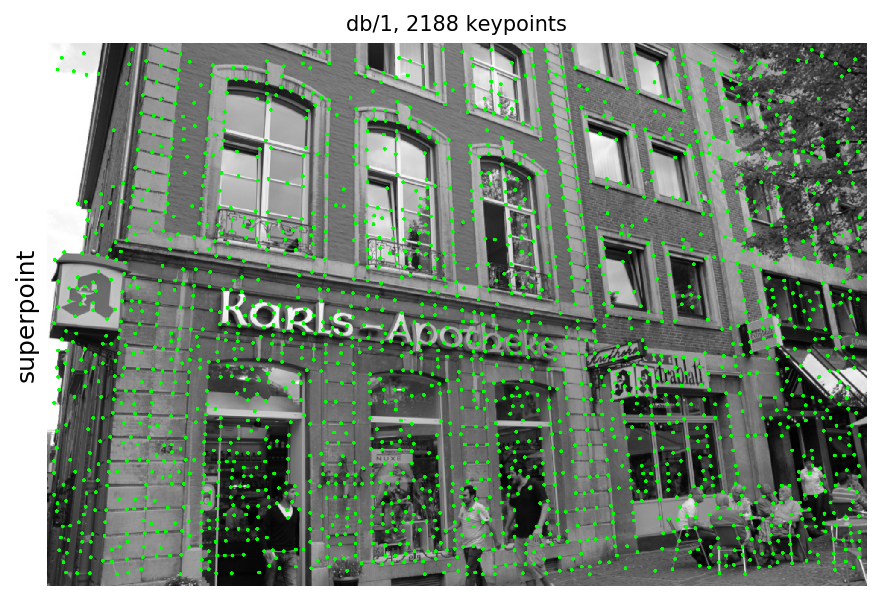

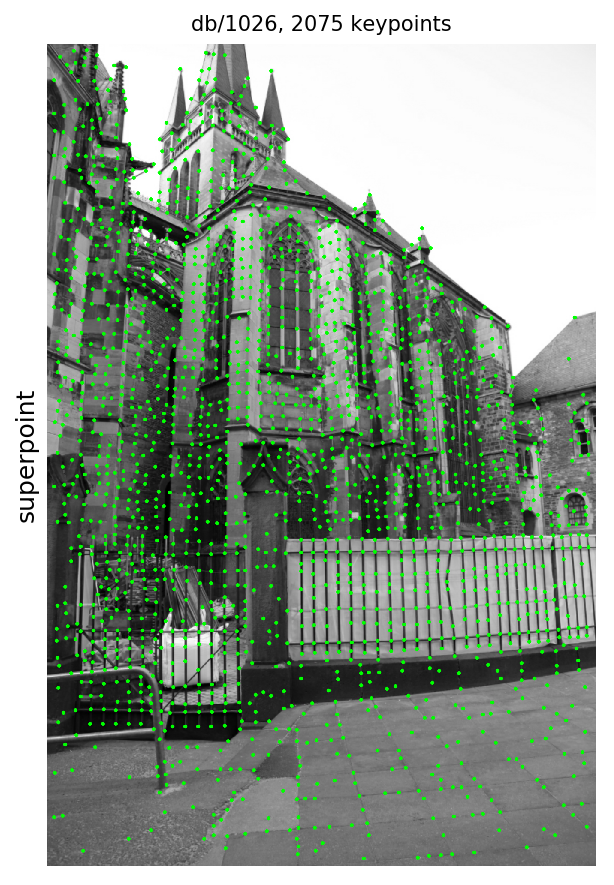

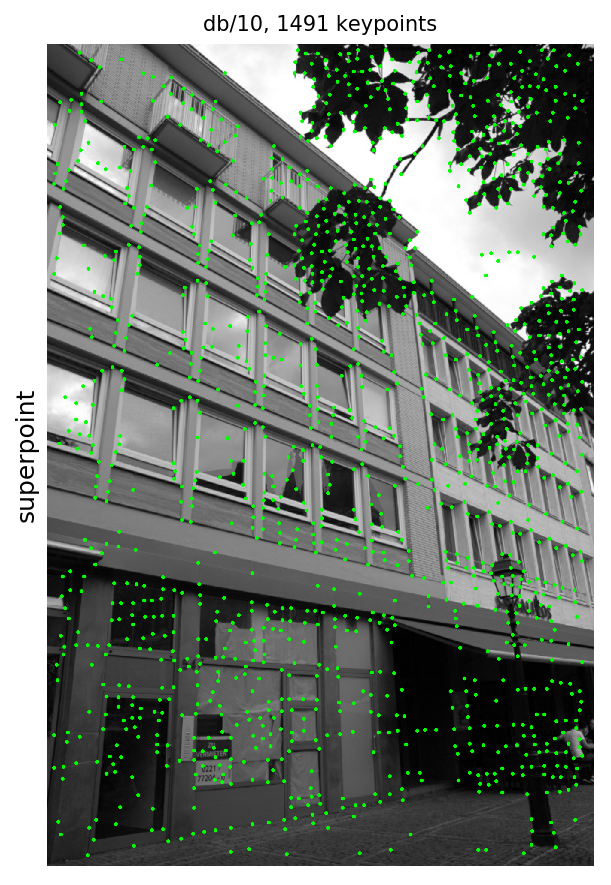

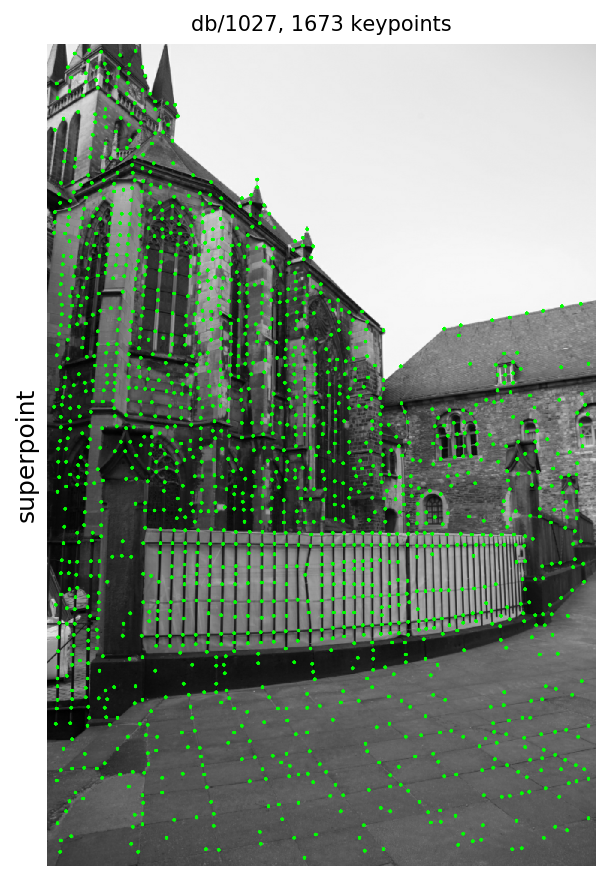

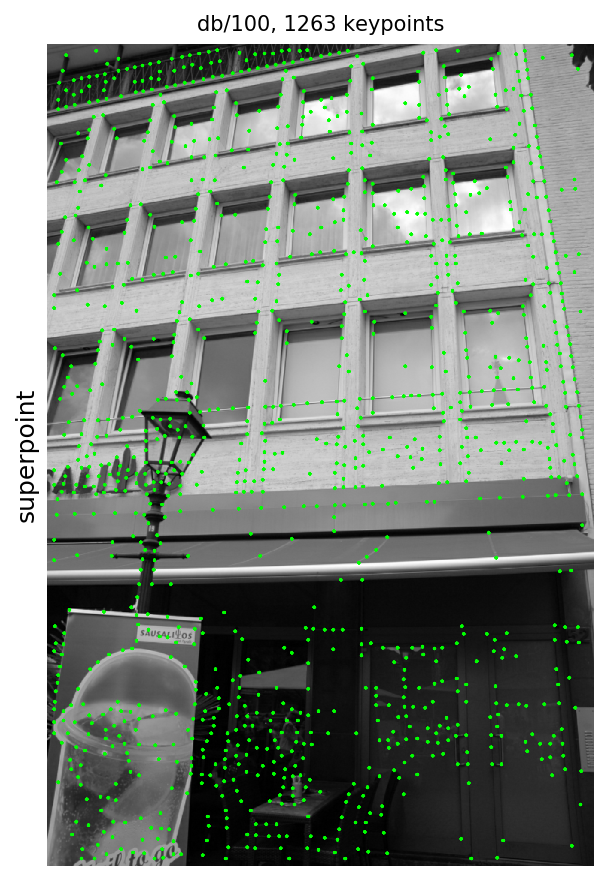

In [21]:
data_iter = dataset.get_test_set()
for _, data in zip(range(5), data_iter):
    for method, config in configs.items():
        pred1 = config['predictor'](data['image'], data['name'], **config)
        
        plot_images(
            [draw_keypoints(data['image'].astype(np.uint8), pred1['keypoints'], s=2, radius=4)],
            dpi=150, ylabel=method, labelfont=12,
            titles=[f"{data['name'].decode('utf-8')}, {len(pred1['keypoints'])} keypoints"])